#### [ 이미지 변환 - 크기 변경 ]
- 이미지 전처리 시 필수
- 수집된 이미지 크기가 모두 달라서 동일 크기를 맞추는 작업

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## [1-1] 모듈 로딩
import cv2                           # 컴퓨터비젼 모듈
import numpy as np                   # 이미지 데이터 저장 모듈
import matplotlib.pyplot as plt      # 시각화 모듈
import os                            # 파일, 폴더, 경로 관련 모듈

In [6]:
## [1-2] 데이터 준비
IMG_DIR  = '../data/image/'
FILENAME = 'cat.png'

[2] 이미지 로딩<hr>

In [7]:
## 로딩 : 경로+파일명 
colorIMG=cv2.imread(IMG_DIR+FILENAME, cv2.IMREAD_COLOR)

In [8]:
## 정보확인
if colorIMG is None:
    print(f"{colorIMG} :이미지 체크")
else:
    print(f'{FILENAME}')
    print(f'형태:{colorIMG.shape}    차원:{colorIMG.ndim}D')

## 이미지 형태 : (행,  열, 채널)

cat.png
형태:(267, 237, 3)    차원:3D


[3] 이미지 크기 조정 <hr>

In [10]:
## [3-1] 이미지 축소 => 보간법 : cv2.INTER_AREA
##        이미지데이터, (축소w, h)
downIMG = cv2.resize(colorIMG, (100,100), interpolation=cv2.INTER_AREA)

print(f'형태:{downIMG.shape}    차원:{downIMG.ndim}D')

형태:(100, 100, 3)    차원:3D


In [12]:
## [3-2] 이미지 확대 => 보간법 : cv2.INTER_LINEAR, cv2.INTER_CUBIC
##       이미지데이터, (확대w, h)
upIMG = cv2.resize(colorIMG, (320,320), interpolation=cv2.INTER_LINEAR)

print(f'{colorIMG.shape} ==>  형태:{upIMG.shape}    차원:{upIMG.ndim}D')

(267, 237, 3) ==>  형태:(320, 320, 3)    차원:3D


In [13]:
## [3-3] 축소, 원본, 확대 이미지 출력
cv2.imshow('[SMALL]', downIMG)
cv2.imshow('[ORIGINAL]', colorIMG)
cv2.imshow('[BIG]', upIMG)

# 이벤트 처리
cv2.waitKey()   # 무한대기
cv2.destroyAllWindows()

[4] openCV => matplotlib 출력 <hr>

In [50]:
## 시각화 기능 함수
def drawImage(row, col, imgList):
    fig, axes  = plt.subplots(row, col)
    axes = axes.flatten() if col >= 2 else [axes]

    for ax, img in zip(axes, imgList):
        ax.imshow(img)
        ax.set_title(f'{img.shape}')
        
    plt.tight_layout() # 보기 좋게 행과 열의 간격 띄우기
    plt.show()

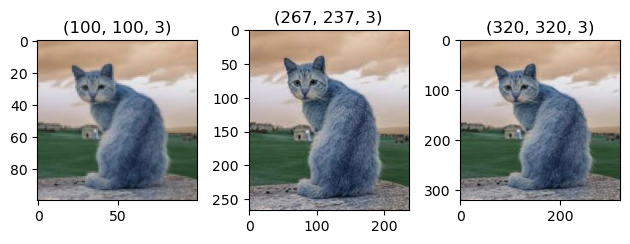

In [51]:
## 시각화 
drawImage(1, 3, [downIMG, colorIMG, upIMG])


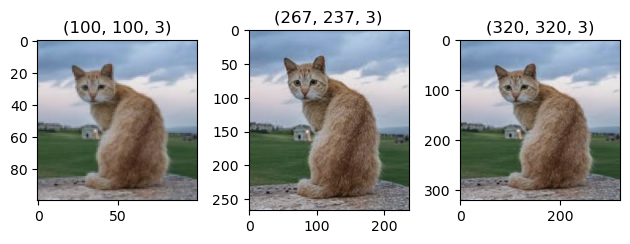

In [53]:
## -------------------------------------------------------
## - opencv 채널 순서 BGR ===> 일반 채널 순서 RGB  변환
##   * cv2.cvtColor(이미지데이터, 변형 형식)
##   * BGR ==> RGB : cv2.COLOR_BGR2RGB
## -------------------------------------------------------
downIMG2  = cv2.cvtColor(downIMG,  cv2.COLOR_BGR2RGB)
colorIMG2 = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2RGB)
upIMG2    = cv2.cvtColor(upIMG,    cv2.COLOR_BGR2RGB)

## -------------------------------------------------------
## 시각화 
## -------------------------------------------------------
drawImage(1, 3, [downIMG2, colorIMG2, upIMG2])

[5] 상대적 크기 이미지 축소/확대<hr>

In [55]:
## [5-0] 현재 이미지 크기 
H, W, _ = colorIMG.shape

print(f'현재 이미지 H : {H},  W : {W}')

현재 이미지 H : 267,  W : 237


In [67]:
## [5-1] 이미지 축소 => 보간법 : cv2.INTER_AREA
##       이미지데이터, (0,0), fx=값<1.0, fy=값<1.0
downIMG = cv2.resize(colorIMG, dsize=(0,0), fx=0.2,  fy=0.2, interpolation=cv2.INTER_AREA)

print(f'형태:{downIMG.shape}    차원:{downIMG.ndim}D')

형태:(53, 47, 3)    차원:3D


In [70]:
## [5-2] 이미지 확대 => 보간법 : cv2.INTER_LINEAR, cv2.INTER_CUBIC
##       이미지데이터, (0,0), fx=값>1.0, fy=값>1.0
upIMG = cv2.resize(colorIMG, dsize=(0,0),  fx=1.7,  fy=1.2, interpolation=cv2.INTER_CUBIC)

print(f'형태:{upIMG.shape}    차원:{upIMG.ndim}D')

형태:(320, 403, 3)    차원:3D


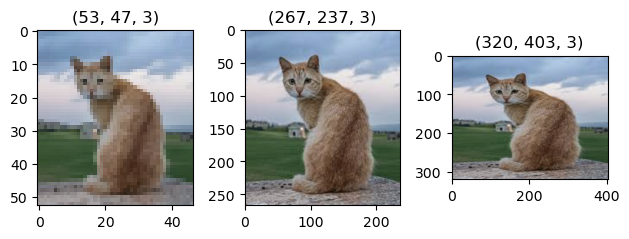

In [71]:
## -------------------------------------------------------
## - opencv 채널 순서 BGR ===> 일반 채널 순서 RGB  변환
##   * cv2.cvtColor(이미지데이터, 변형 형식)
##   * BGR ==> RGB : cv2.COLOR_BGR2RGB
## -------------------------------------------------------
downIMG2  = cv2.cvtColor(downIMG,  cv2.COLOR_BGR2RGB)
colorIMG2 = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2RGB)
upIMG2    = cv2.cvtColor(upIMG,    cv2.COLOR_BGR2RGB)

## -------------------------------------------------------
## 시각화 
## -------------------------------------------------------
drawImage(1, 3, [downIMG2, colorIMG2, upIMG2])